In [1]:
import heapq 
from collections import deque

In [2]:
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 6)],
    'C': [('D', 3)],
    'D': []
}

def uniform_cost_search(graph, start, goal):
    pq = [(0, start)]
    visited = {start: (0, None)}
    nodes_traversed = 0

    while pq:
        current_cost, current_node = heapq.heappop(pq)
        nodes_traversed += 1

        if current_node == goal:
            path = reconstruct_path(visited, start, goal)
            return current_cost, path, nodes_traversed

        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(pq, (total_cost, neighbor))

    return float('inf'), [], nodes_traversed


In [3]:
def breadth_first_search(graph, start, goal):
    queue = deque([start])
    visited = {start: None}
    nodes_traversed = 0

    while queue:
        current_node = queue.popleft()
        nodes_traversed += 1

        if current_node == goal:
            path = reconstruct_path(visited, start, goal)
            return len(path) - 1, path, nodes_traversed

        for neighbor, _ in graph[current_node]:
            if neighbor not in visited:
                visited[neighbor] = current_node
                queue.append(neighbor)

    return float('inf'), [], nodes_traversed

In [4]:
def depth_first_search(graph, start, goal):
    stack = [start]
    visited = {start: None}
    nodes_traversed = 0

    while stack:
        current_node = stack.pop()
        nodes_traversed += 1

        if current_node == goal:
            path = reconstruct_path(visited, start, goal)
            return len(path) - 1, path, nodes_traversed

        for neighbor, _ in reversed(graph[current_node]):
            if neighbor not in visited:
                visited[neighbor] = current_node
                stack.append(neighbor)

    return float('inf'), [], nodes_traversed

In [5]:
def best_first_search(graph, start, goal):
    pq = [(0, start)]
    visited = {start: None}
    nodes_traversed = 0

    while pq:
        heuristic_cost, current_node = heapq.heappop(pq)
        nodes_traversed += 1

        if current_node == goal:
            path = reconstruct_path(visited, start, goal)
            return heuristic_cost, path, nodes_traversed

        for neighbor, cost in graph[current_node]:
            if neighbor not in visited:
                visited[neighbor] = current_node
                heapq.heappush(pq, (cost, neighbor))

    return float('inf'), [], nodes_traversed

In [7]:
def reconstruct_path(visited, start, goal):
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1] if isinstance(visited[current], tuple) else visited[current]
    path.reverse()
    return path

def compare_algorithms(graph, start, goal):
    print("Comparing Algorithms:")
    algorithms = {
        "Uniform Cost Search": uniform_cost_search,
        "Breadth First Search": breadth_first_search,
        "Depth First Search": depth_first_search,
        "Best First Search": best_first_search
    }

    for name, algorithm in algorithms.items():
        cost, path, nodes_traversed = algorithm(graph, start, goal)
        print(f"{name}:")
        print(f"  Path: {path}")
        print(f"  Cost: {cost}")
        print(f"  Nodes Traversed: {nodes_traversed}")
        print()

start = 'A'
goal = 'D'
compare_algorithms(graph, start, goal)

Comparing Algorithms:
Uniform Cost Search:
  Path: ['A', 'B', 'C', 'D']
  Cost: 6
  Nodes Traversed: 5

Breadth First Search:
  Path: ['A', 'B', 'D']
  Cost: 2
  Nodes Traversed: 4

Depth First Search:
  Path: ['A', 'B', 'D']
  Cost: 2
  Nodes Traversed: 3

Best First Search:
  Path: ['A', 'B', 'D']
  Cost: 6
  Nodes Traversed: 4



Uniform Cost Search:
  Path: ['A', 'B', 'C', 'D']
  Cost: 6
  Nodes Traversed: 5



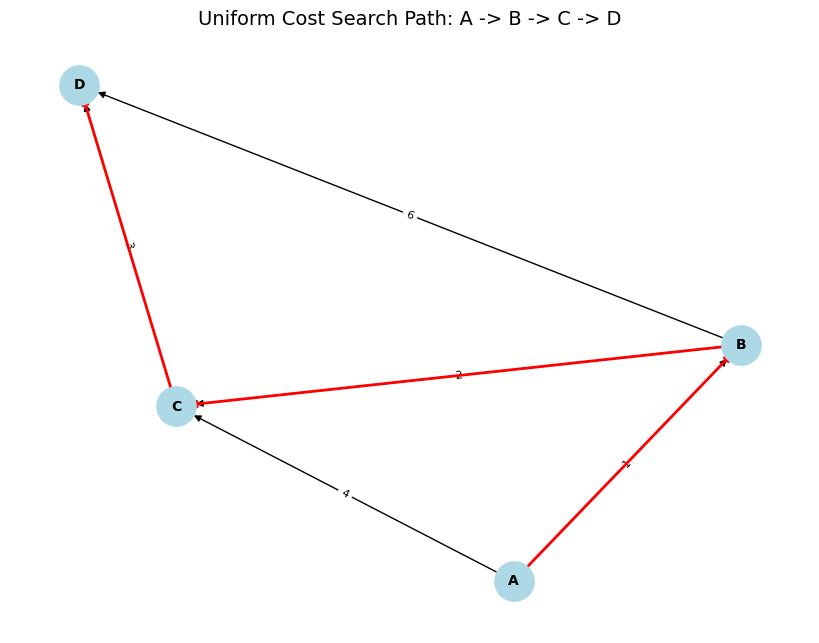

Breadth First Search:
  Path: ['A', 'B', 'D']
  Cost: 2
  Nodes Traversed: 4



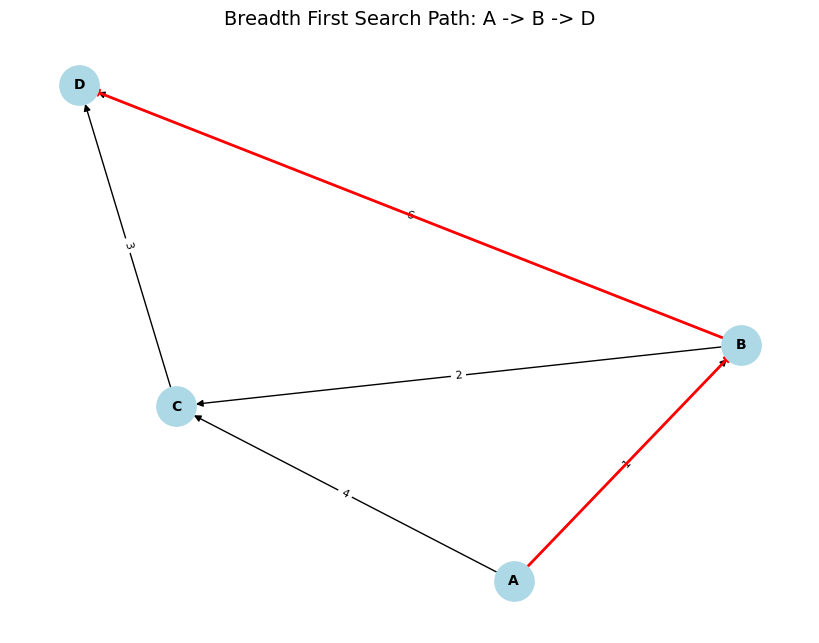

Depth First Search:
  Path: ['A', 'B', 'D']
  Cost: 2
  Nodes Traversed: 3



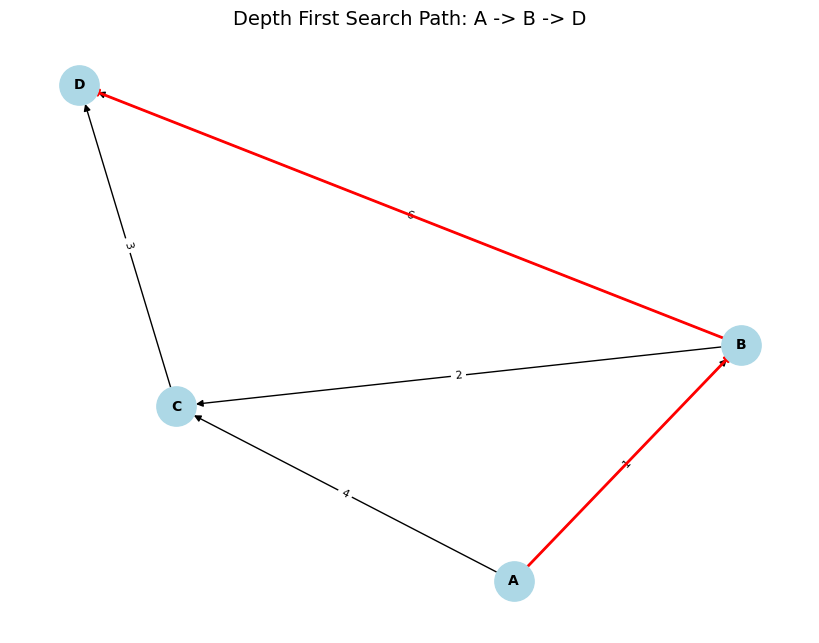

Best First Search:
  Path: ['A', 'B', 'D']
  Cost: 6
  Nodes Traversed: 4



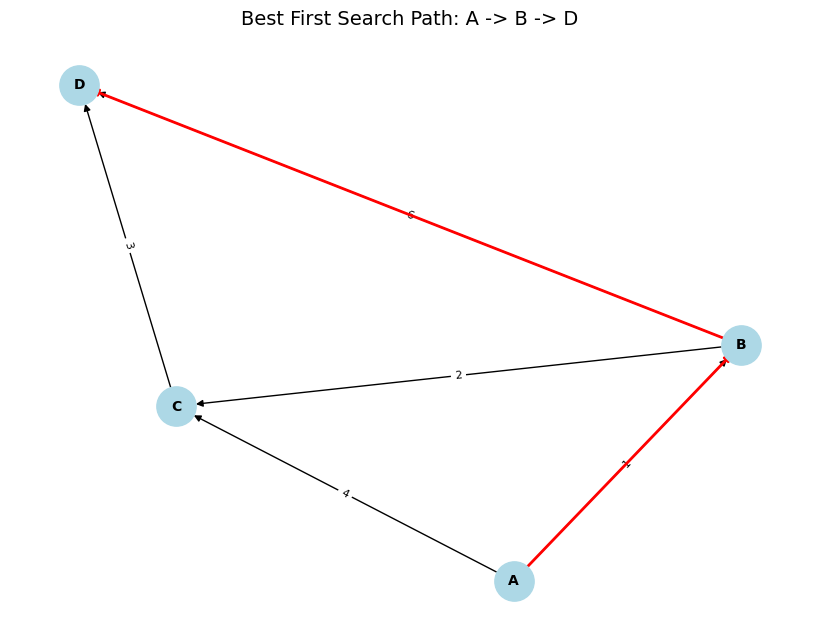

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, path, algorithm_name):
    G = nx.DiGraph()
    
    for node, neighbors in graph.items():
        for neighbor, cost in neighbors:
            G.add_edge(node, neighbor, weight=cost)
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=10, font_weight="bold")

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

    plt.title(f"{algorithm_name} Path: {' -> '.join(path)}", fontsize=14)
    plt.show()

def compare_and_visualize(graph, start, goal):
    algorithms = {
        "Uniform Cost Search": uniform_cost_search,
        "Breadth First Search": breadth_first_search,
        "Depth First Search": depth_first_search,
        "Best First Search": best_first_search
    }

    for name, algorithm in algorithms.items():
        cost, path, nodes_traversed = algorithm(graph, start, goal)
        print(f"{name}:")
        print(f"  Path: {path}")
        print(f"  Cost: {cost}")
        print(f"  Nodes Traversed: {nodes_traversed}")
        print()
        visualize_graph(graph, path, name)

start = 'A'
goal = 'D'
compare_and_visualize(graph, start, goal)